In [25]:
# 非分片tps处理
import pandas as pd
path = 'hbbft_16_1000-5000.csv'
df = pd.read_csv(path)
# print(df)
# data = (df.loc[df['id'] == 7], df['node'] == 16, df['batchsize'] == 1000)
# data = (df.loc[df['id'] == 7], df.loc[df['node'] == 16], df.loc[df['batchsize'] == 1000])
flag =[]

data = (df.loc[(df['id'] == 7) & (df['node'] ==16) & (df['batchsize'] == 1000),:])
de = (data['delay'])
mean_delay = (data['delay'].astype('float').sum()) / 7
mean_tps = (data['tps'].astype('float').sum()) / 7
print(mean_delay)
print(mean_tps)
print(type(de))
print(data)


16.66843342781067
999.139930384655
<class 'pandas.core.series.Series'>
   id  node  batchsize      delay     tx          tps  send  round
0   7    16       1000  19.752337  16000   810.030713  5590      0
1   7    16       1000  15.745284  16000  1016.177314  4580      1
2   7    16       1000  12.546549  16000  1275.251083  4180      2
3   7    16       1000  14.308185  16000  1118.241055  4130      3
4   7    16       1000  15.786919  16000  1013.497291  4540      4
5   7    16       1000  14.673965  16000  1090.366494  4410      5
6   7    16       1000  23.865794  16000   670.415563  6900      6


In [14]:
import pandas as pd
path = 'hbbft.csv'
protocol_list = ['hbbft.csv', 'dumbo.csv']
node_list = [16, 32, 64, 96]
batch_list = [1000, 2000, 3000, 4000, 5000]
df = pd.read_csv(path)
total = 0

mean = []
r = 7
node = 16
batchsize = 1000
for i in node_list:
    for j in batch_list:
        for h in range(i):
            data = (df.loc[(df['id'] == h) & (df['node'] == i) & (df['batchsize'] == j),:])
            mean_tps = (data['tps'].astype('float').sum()) / r
            mean.append(mean_tps)
        # print(mean)
        print(i)

        for n in range(i):
            total += mean[n]
        mean_mean = total / node
        total = 0
        mean.clear()
        print('this is the node:',i,'batchsize:',j,'mean_tps', mean_mean)

16
this is the node: 16 batchsize: 1000 mean_tps 999.344651271388
16
this is the node: 16 batchsize: 2000 mean_tps 1972.2289261514516
16
this is the node: 16 batchsize: 3000 mean_tps 2937.647887242133
16
this is the node: 16 batchsize: 4000 mean_tps 3832.705760132002
16
this is the node: 16 batchsize: 5000 mean_tps 4776.674911356351
32
this is the node: 32 batchsize: 1000 mean_tps 1077.4867214368444
32
this is the node: 32 batchsize: 2000 mean_tps 2129.178293193729
32
this is the node: 32 batchsize: 3000 mean_tps 3164.126124867609
32
this is the node: 32 batchsize: 4000 mean_tps 4186.363996991946
32
this is the node: 32 batchsize: 5000 mean_tps 5213.898644643069
64
this is the node: 64 batchsize: 1000 mean_tps 1048.2883494088662
64
this is the node: 64 batchsize: 2000 mean_tps 2107.331668991244
64
this is the node: 64 batchsize: 3000 mean_tps 3134.0254816578854
64
this is the node: 64 batchsize: 4000 mean_tps 4128.601912180843
64
this is the node: 64 batchsize: 5000 mean_tps 5063.63385

In [150]:
import pandas as pd
path = 'hbbft.csv'
protocol_list = ['hbbft.csv', 'dumbo.csv']
node_list = [16, 32, 64, 96]
batch_list = [1000, 2000, 3000, 4000, 5000]
df = pd.read_csv(path)
total = 0

mean = []
delay_list = []
send_list = []
r = 7
node = 96
batchsize = 2000
total_delay = 0
total_send = 0
for i in range(node):
    data = (df.loc[(df['id'] == i) & (df['node'] == node) & (df['batchsize'] == batchsize * node),:])
    delay = (data['delay'].astype('float').sum()) / r
    mean_tps = (data['tps'].astype('float').sum()) / r
    send = (data['send'].astype('float').sum()) / r
    if mean_tps != 0 and delay != 0 and send != 0:
        mean.append(mean_tps)
        delay_list.append(delay)
        if send > 200:
            send_list.append(send)
for n in range(len(mean)):
    total += mean[n]
for i in range(len(delay_list)):
    total_delay += delay_list[i]
for i in range(len(send_list)):
    total_send += send_list[i]
mean_delay = total_delay / len(delay_list)
mean_mean = total / len(mean)
mean_send = total_send / len(send_list)
print('this is the node:',node,'batchsize:',batchsize,'mean_delay', mean_delay,'mean_tps', mean_mean,'mean_send:', mean_send)

ZeroDivisionError: division by zero

In [1]:
import pandas as pd
path = 'hbbft.csv'
df = pd.read_csv(path)
shard = 4
batchsize = 5000
node = 16
r = 7
shard_amount = node / shard
mean_shard = []
tx_list = []
send_list = []
total_delay = 0
total_tx = 0
total_send = 0
ttx = 0
for i in range(node):
    data = (df.loc[(df['id'] == i) & (df['node'] == node) & (df['batchsize'] == batchsize),:])
    delay = (data['delay'].astype('float').sum()) / r
    tx =(data['tx'].astype('float').sum()) / r
    send = (data['send'].astype('float').sum()) / r
    if tx != 0:
        # print('this is the node tx', i, tx)
        tx_list.append(tx)
    if send > 200:
        send_list.append(send)
    if delay != 0:
        mean_shard.append(delay)
for i in range(len(mean_shard)):
    total_delay += mean_shard[i]
mean_delay = total_delay / len(mean_shard)
for i in range(len(send_list)):
    total_send += send_list[i]
for i in range(len(tx_list)):
    # print(total_tx, tx_list[i])
    ttx += tx_list[i]
for i in range(shard):
    data = (df.loc[(df['shard_id'] == i) & (df['node'] == node) & (df['batchsize'] == batchsize) & (df['shard'] == shard),:])
    # txa =(data['tx'].astype('float').sum()) / (shard*r)
    # print(txa, i)
total_tx = (ttx/len(tx_list)) * shard
mean_tps = (total_tx / mean_delay)
# mean_tx = total_tx / len(tx_list)
mean_tx = total_tx / shard
mean_send = total_send / len(send_list)

print('node:',node,'batchsize:',batchsize,'shard_number:', shard,'mean_delay:', mean_delay,'total tx:', total_tx,'mean_tx:',mean_tx, 'mean_tps:', mean_tps,'mean_send:', mean_send)
# print('this is the node:', node, 'batchsize:', batchsize,'mean_tps :', mean_tps)


KeyError: 'shard_id'

In [2]:
import pandas as pd
path = 'dumbo.csv'
df = pd.read_csv(path)
shard = 4
batchsize = 5000
node = 96
r = 7
shard_amount = node / shard
mean_shard = []
tx_list = []
send_list = []
total_delay = 0
total_tx = 0
total_send = 0
ttx = 0
for i in range(node):
    data = (df.loc[(df['id'] == i) & (df['node'] == node) & (df['batchsize'] == batchsize * node),:])
    delay = (data['delay'].astype('float').sum()) / r
    tx =(data['tx'].astype('float').sum()) / r
    send = (data['send'].astype('float').sum()) / r
    if tx != 0:
        # print('this is the node tx', i, tx)
        tx_list.append(tx)
    if send > 200:
        send_list.append(send)
    if delay != 0:
        mean_shard.append(delay)
for i in range(len(mean_shard)):
    total_delay += mean_shard[i]
mean_delay = total_delay / len(mean_shard)
for i in range(len(send_list)):
    total_send += send_list[i]
for i in range(len(tx_list)):
    # print(total_tx, tx_list[i])
    ttx += tx_list[i]

total_tx = ttx/len(tx_list)
mean_tps = (total_tx / mean_delay)
mean_tx = total_tx / len(tx_list)
mean_send = total_send / len(send_list)

print('node:',node,'batchsize:',batchsize,'mean_delay:', mean_delay,'total tx:', total_tx,'mean_tx:',total_tx, 'mean_tps:', mean_tps,'mean_send:', mean_send)
# print('this is the node:', node, 'batchsize:', batchsize,'mean_tps :', mean_tps)


node: 96 batchsize: 5000 mean_delay: 68.59302657452368 total tx: 360000.0 mean_tx: 360000.0 mean_tps: 5248.34692355897 mean_send: 965.2017857142858


<AxesSubplot:>

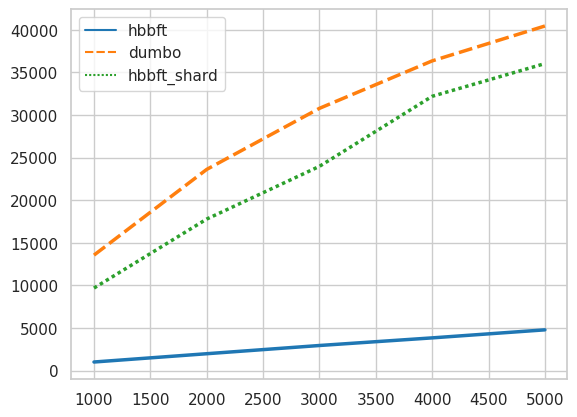

In [244]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

consus = [
    [999.344651271388,13551.868286753004,9684.476891828554],
    [1972.2289261514516,23614.632791418135,17784.056132237685],
    [2937.647887242133,30785.888498003704,23974.74051790485],
    [3832.705760132002,36358.1397573404,32198.876029511746],
    [4776.674911356351,40453.59206446519,36039.503565574145]
]
data_value = np.asarray(consus)
batch_list = [1000, 2000, 3000, 4000, 5000]
batch = np.asarray(batch_list)
data = pd.DataFrame(data_value, batch, columns=["hbbft", "dumbo", "hbbft_shard"])


# data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

<AxesSubplot:>

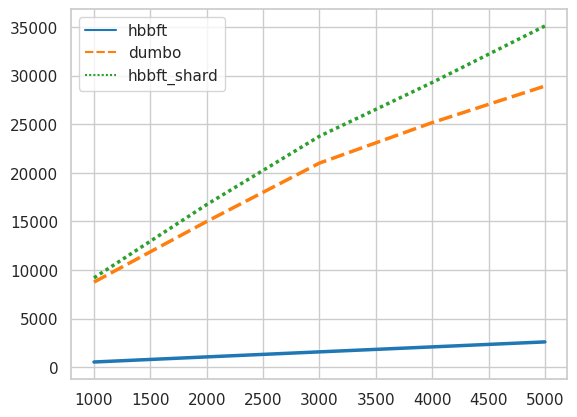

In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

consus = [
    [538.7433607184222,8756.585293305574,9194.306617889602],
    [1064.5891465968646,14995.414256313847,16735.92540061401],
    [1582.0630624338046,21002.571350271493,23763.256870229605],
    [2093.181998495973,25163.438058597934,29291.45895795729],
    [2606.9493223215345,28925.00794828205,35104.22712575278]
]
data_value = np.asarray(consus)
batch_list = [1000, 2000, 3000, 4000, 5000]
batch = np.asarray(batch_list)
data = pd.DataFrame(data_value, batch, columns=["hbbft", "dumbo", "hbbft_shard"])


# data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

<AxesSubplot:>

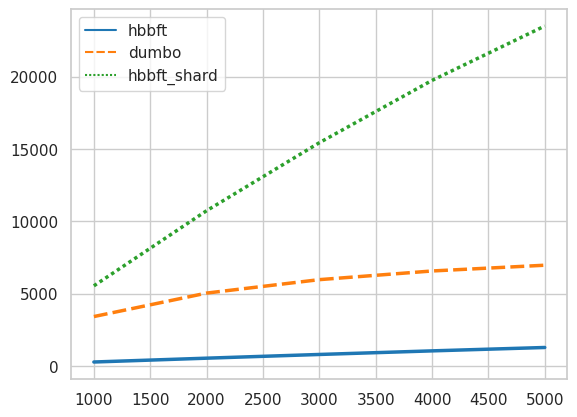

In [242]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

consus = [
    [262.07208735221656,3405.7479932864185,5529.6797708578015],
    [526.832917247811,5028.2487677134095,10726.463260931934],
    [783.5063704144713,5958.233312359928,15428.208793855518],
    [1032.1504780452108,6557.326447610786,19738.727499187913],
    [1265.9084634827286,6956.06503566422,23500.321942491217]
]
data_value = np.asarray(consus)
batch_list = [1000, 2000, 3000, 4000, 5000]
batch = np.asarray(batch_list)
data = pd.DataFrame(data_value, batch, columns=["hbbft", "dumbo", "hbbft_shard"])


sns.lineplot(data=data, palette="tab10", linewidth=2.5)

<AxesSubplot:>

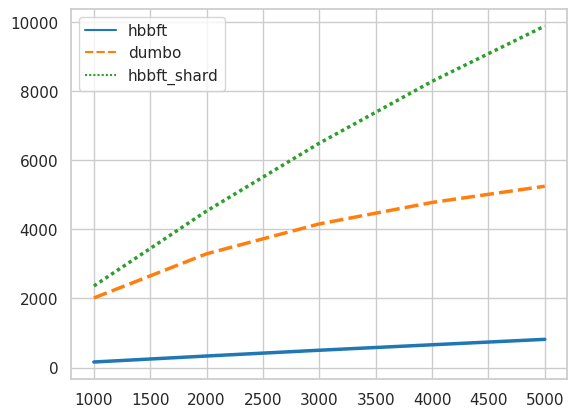

In [241]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

consus = [
    [161.94605735777483,2015.102170362338,2362.1975920985287],
    [335.5100540795632,3293.6700914731628, 4531.884474264948],
    [502.5764245276496,4158.43915566455,6494.427450378067],
    [660.5897030606457,4778.928788668063,8283.547316745031], 
    [817.8682719869912,5248.546889603578,9885.056926186153]
]
data_value = np.asarray(consus)
batch_list = [1000, 2000, 3000, 4000, 5000]
batch = np.asarray(batch_list)
data = pd.DataFrame(data_value, batch, columns=["hbbft", "dumbo", "hbbft_shard"])


sns.lineplot(data=data, palette="tab10", linewidth=2.5)

<AxesSubplot:>

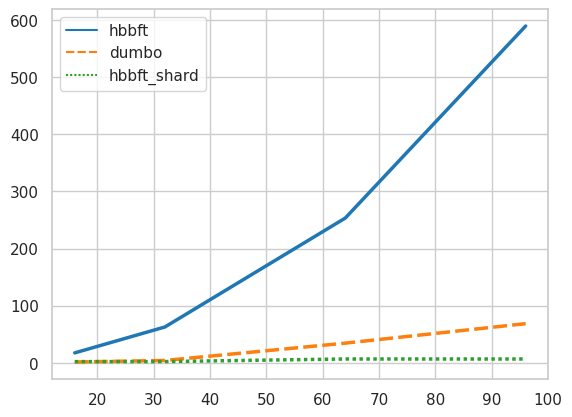

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

consus = [
    [17.458678034799437,1.4912730859858647,2.1801473604781285],
    [62.77888315383876,4.153386402343001, 2.2382326860513007],
    [253.3399740340455,34.50407603276628,6.778022644775255],
    [589.3519345812853,68.59302657452368,6.744186418397083]
]
data_value = np.asarray(consus)
batch_list = [16, 32, 64, 96]
batch = np.asarray(batch_list)
data = pd.DataFrame(data_value, batch, columns=["hbbft", "dumbo", "hbbft_shard"])


sns.lineplot(data=data, palette="tab10", linewidth=2.5)

<AxesSubplot:>

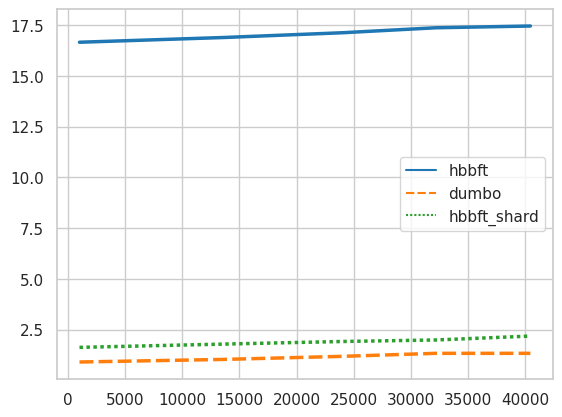

In [11]:
# figure3 n=16
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

consus = [
    [16.658536370311463,0.9016208222934177,1.6226261769022257],
    [16.890742225306376,1.0286402638469423, 1.7832987861973901],
    [17.126071870326996,1.1799578581537518,1.9127273900168285],
    [17.372268700173922,1.329521309052195,1.9876470203910555],
    [17.458678034799437,1.329521309052195,2.1801473604781285]
]
data_value = np.asarray(consus)
# batch_list = [16, 32, 64, 96]
# tps_list = [999.344651271388,4776.674911356351,17784.056132237685,30785.888498003704, 40453.59206446519]
tps_list = [999.344651271388,13551.868286753004, 20000, 30000, 40453.59206446519]
batch = np.asarray(batch_list)
data = pd.DataFrame(data_value, tps_list, columns=["hbbft", "dumbo", "hbbft_shard"])


sns.lineplot(data=data, palette="tab10", linewidth=2.5)